In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# Import the ShapeMapper Profile data for GSTP1
profile_premRNA = pd.read_csv("/data1/Madrasin_HiSeq_October2018/AlignmentFiles_Bowtie2_ShapeMapper2Parms/GSTP1_GenomeVsTranscriptome/GSTP1_genome_SHAPE_PremRNA/Pipeline_GSTP1_genome_profile.txt",sep="\t")
profile_premRNA.head()

,Nucleotide,Sequence,Modified_mutations,Modified_read_depth,Modified_effective_depth,Modified_rate,Modified_off_target_mapped_depth,Modified_low_mapq_mapped_depth,Modified_mapped_depth,Untreated_mutations,...,Denatured_rate,Denatured_off_target_mapped_depth,Denatured_low_mapq_mapped_depth,Denatured_mapped_depth,Reactivity_profile,Std_err,HQ_profile,HQ_stderr,Norm_profile,Norm_stderr
0,1,U,0,12,9,0.000000,0,0,12,0,...,NaN,0,0,0,0.000000,0.000000,NaN,NaN,NaN,NaN
1,2,G,0,12,9,0.000000,0,0,12,0,...,NaN,0,0,0,0.000000,0.000000,NaN,NaN,NaN,NaN
2,3,G,1,12,11,0.090909,0,0,12,0,...,NaN,0,0,0,0.090909,0.090909,NaN,NaN,NaN,NaN
3,4,G,1,12,9,0.111111,0,0,12,0,...,NaN,0,0,0,0.111111,0.111111,NaN,NaN,NaN,NaN
4,5,A,0,12,8,0.000000,0,0,12,0,...,NaN,0,0,0,0.000000,0.000000,NaN,NaN,NaN,NaN


In [14]:
# Melt the profile data
profile_premRNA_melted = profile_premRNA.melt(id_vars=["Nucleotide"],value_vars=["Modified_effective_depth","Untreated_effective_depth"])
profile_premRNA_melted.head()

,Nucleotide,variable,value
0,1,Modified_effective_depth,9
1,2,Modified_effective_depth,9
2,3,Modified_effective_depth,11
3,4,Modified_effective_depth,9
4,5,Modified_effective_depth,8


In [15]:
profile_premRNA_melted.tail()

,Nucleotide,variable,value
6113,3055,Untreated_effective_depth,49
6114,3056,Untreated_effective_depth,49
6115,3057,Untreated_effective_depth,44
6116,3058,Untreated_effective_depth,41
6117,3059,Untreated_effective_depth,0


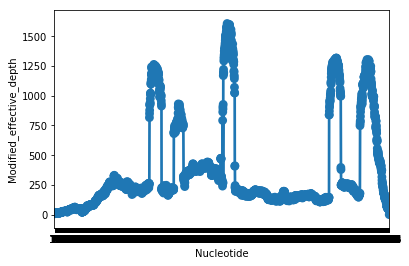

In [3]:
# plot data
ax = sns.pointplot(x="Nucleotide", y="Modified_effective_depth",data=profile_premRNA)

In [4]:
# Load R GGplots
%load_ext rpy2.ipython
%R require(ggplot2)
%R require(reshape)

/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: ggplot2

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: reshape

  warnings.warn(x, RRuntimeWarning)


array([1], dtype=int32)

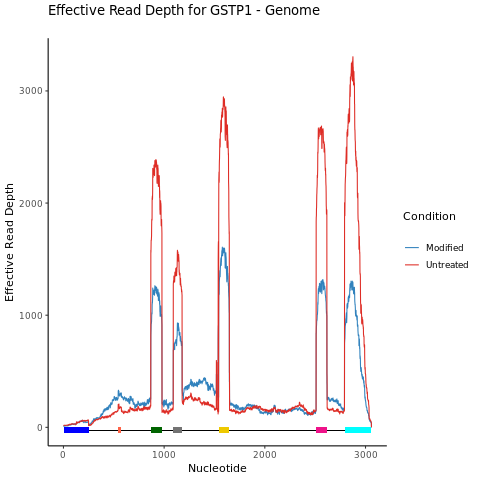

In [31]:
%%R -i profile_premRNA_melted
p <- ggplot(data=profile_premRNA_melted, aes(x=Nucleotide, y=value,group=variable)) +
    geom_line(aes(color=variable)) +
    theme_classic() +
    geom_rect(xmin=1,xmax=250,ymin=0,ymax=-50,fill="blue") +
    geom_rect(xmin=250,xmax=539,ymin=-35,ymax=-25,fill="black") +
    geom_rect(xmin=539,xmax=575,ymin=0,ymax=-50,fill="tomato") +
    geom_rect(xmin=575,xmax=869,ymin=-35,ymax=-25,fill="black") +
    geom_rect(xmin=869,xmax=976,ymin=0,ymax=-50,fill="darkgreen") +
    geom_rect(xmin=976,xmax=1090,ymin=-35,ymax=-25,fill="black") +
    geom_rect(xmin=1090,xmax=1178,ymin=0,ymax=-50,fill="grey45") +
    geom_rect(xmin=1178,xmax=1543,ymin=-35,ymax=-25,fill="black") +
    geom_rect(xmin=1543,xmax=1647,ymin=0,ymax=-50,fill="gold2") +
    geom_rect(xmin=1647,xmax=2509,ymin=-35,ymax=-25,fill="black") +
    geom_rect(xmin=2509,xmax=2617,ymin=0,ymax=-50,fill="deeppink2") +
    geom_rect(xmin=2617,xmax=2794,ymin=-35,ymax=-25,fill="black") +
    geom_rect(xmin=2794,xmax=3059,ymin=0,ymax=-50,fill="cyan") +
    labs(title = "Effective Read Depth for GSTP1 - Genome \n", x = "Nucleotide", y = "Effective Read Depth", color = "Condition\n") + 
    scale_color_manual(labels=c("Modified","Untreated"),values=c("#3182bd", "#de2d26"))
ggsave(p,file="../results/Madrasin_HiSeq_October2018_alignments/GSTP1-ShapeMapper/EffectiveReadDepth_Pre-mRNA.png",width=8.1,height=5.6,dpi=300)
p

In [27]:
# Import the ShapeMapper Profile data for GSTP1 mature RNA
profile_maturemRNA = pd.read_csv("/data1/Madrasin_HiSeq_October2018/AlignmentFiles_Bowtie2_ShapeMapper2Parms/GSTP1_GenomeVsTranscriptome/GSTP1_transcriptome_SHAPE_MaturemRNA/Pipeline_GSTP1_transcriptome_profile.txt",sep="\t")
profile_maturemRNA.head()

,Nucleotide,Sequence,Modified_mutations,Modified_read_depth,Modified_effective_depth,Modified_rate,Modified_off_target_mapped_depth,Modified_low_mapq_mapped_depth,Modified_mapped_depth,Untreated_mutations,...,Denatured_rate,Denatured_off_target_mapped_depth,Denatured_low_mapq_mapped_depth,Denatured_mapped_depth,Reactivity_profile,Std_err,HQ_profile,HQ_stderr,Norm_profile,Norm_stderr
0,1,U,0,1,0,NaN,0,0,1,0,...,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,G,0,1,0,NaN,0,0,1,0,...,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,G,0,1,1,0.0,0,0,1,0,...,NaN,0,0,0,0.0,0.0,NaN,NaN,NaN,NaN
3,4,G,0,1,0,NaN,0,0,1,0,...,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,A,0,1,0,NaN,0,0,1,0,...,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Melt the profile data
profile_maturemRNA_melted = profile_maturemRNA.melt(id_vars=["Nucleotide"],value_vars=["Modified_effective_depth","Untreated_effective_depth"])
profile_maturemRNA_melted.head()

,Nucleotide,variable,value
0,1,Modified_effective_depth,0
1,2,Modified_effective_depth,0
2,3,Modified_effective_depth,1
3,4,Modified_effective_depth,0
4,5,Modified_effective_depth,0


In [29]:
profile_maturemRNA_melted.tail()

,Nucleotide,variable,value
1911,954,Untreated_effective_depth,0
1912,955,Untreated_effective_depth,0
1913,956,Untreated_effective_depth,0
1914,957,Untreated_effective_depth,0
1915,958,Untreated_effective_depth,0


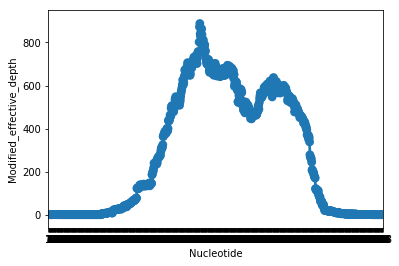

In [30]:
# plot data
ax = sns.pointplot(x="Nucleotide", y="Modified_effective_depth",data=profile_maturemRNA)

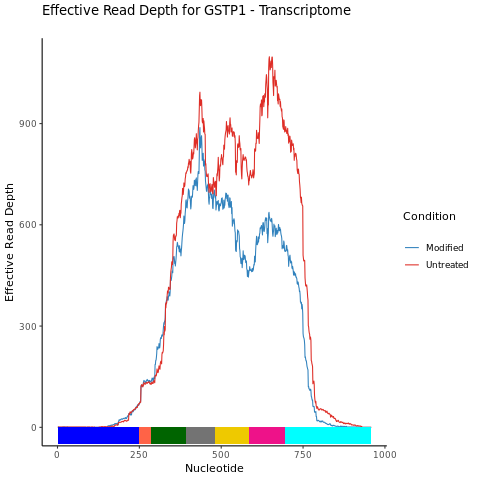

In [32]:
%%R -i profile_maturemRNA_melted
p <- ggplot(data=profile_maturemRNA_melted, aes(x=Nucleotide, y=value,group=variable)) +
    geom_line(aes(color=variable)) +
    theme_classic() +
    geom_rect(xmin=1,xmax=250,ymin=0,ymax=-50,fill="blue") +
    geom_rect(xmin=250,xmax=287,ymin=0,ymax=-50,fill="tomato") +
    geom_rect(xmin=287,xmax=394,ymin=0,ymax=-50,fill="darkgreen") +
    geom_rect(xmin=394,xmax=482,ymin=0,ymax=-50,fill="grey45") +
    geom_rect(xmin=482,xmax=586,ymin=0,ymax=-50,fill="gold2") +
    geom_rect(xmin=586,xmax=694,ymin=0,ymax=-50,fill="deeppink2") +
    geom_rect(xmin=694,xmax=958,ymin=0,ymax=-50,fill="cyan") +
    labs(title = "Effective Read Depth for GSTP1 - Transcriptome \n", x = "Nucleotide", y = "Effective Read Depth", color = "Condition\n") + 
    scale_color_manual(labels=c("Modified","Untreated"),values=c("#3182bd", "#de2d26"))
ggsave(p,file="../results/Madrasin_HiSeq_October2018_alignments/GSTP1-ShapeMapper/EffectiveReadDepth_Mature-mRNA.png",width=8.1,height=5.6,dpi=300)
p